In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [65]:
trainingset = pd.read_csv('/home/abhayvashokan/Productivity/Coding/Data Science/Titanic/train.csv')
testset     = pd.read_csv('/home/abhayvashokan/Productivity/Coding/Data Science/Titanic/test.csv')
trainingset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
trainingset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
trainingset.dropna(subset = ['Embarked'], inplace = True)

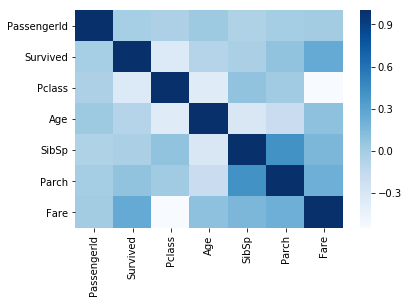

In [5]:
sns.heatmap(trainingset.corr(), cmap = 'Blues')

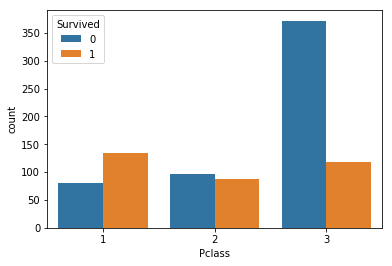

In [6]:
sns.countplot('Pclass', hue = 'Survived', data = trainingset)

In [16]:
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
trainingset[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.740385
male,0.188908


In [21]:
trainingset[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [69]:
cat_data = pd.get_dummies(trainingset.iloc[:, [2, 4, 11]], drop_first = True)
cat_data.values.shape

(891, 4)

In [54]:
X = cat_data.values
y = trainingset.Survived.values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy').fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8033707865168539

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 128, input_dim = 4, activation = 'relu'))
classifier.add(Dense(units = 128, input_dim = 4, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

classifier.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

classifier.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 0s 290us/sample - loss: 0.5800 - accuracy: 0.6568 - val_loss: 0.5728 - val_accuracy: 0.7584
Epoch 2/100
711/711 [==============================] - 0s 53us/sample - loss: 0.5060 - accuracy: 0.7989 - val_loss: 0.5724 - val_accuracy: 0.7584
Epoch 3/100
711/711 [==============================] - 0s 75us/sample - loss: 0.5121 - accuracy: 0.7932 - val_loss: 0.5323 - val_accuracy: 0.7584
Epoch 4/100
711/711 [==============================] - 0s 59us/sample - loss: 0.4714 - accuracy: 0.8003 - val_loss: 0.5236 - val_accuracy: 0.7584
Epoch 5/100
711/711 [==============================] - 0s 78us/sample - loss: 0.4594 - accuracy: 0.8003 - val_loss: 0.5125 - val_accuracy: 0.8034
Epoch 6/100
711/711 [==============================] - 0s 80us/sample - loss: 0.4497 - accuracy: 0.8003 - val_loss: 0.5115 - val_accuracy: 0.8034
Epoch 7/100
711/711 [==============================] - 0s 93us/sample - loss:

711/711 [==============================] - 0s 59us/sample - loss: 0.4366 - accuracy: 0.7975 - val_loss: 0.5058 - val_accuracy: 0.8034
Epoch 57/100
711/711 [==============================] - 0s 57us/sample - loss: 0.4271 - accuracy: 0.8129 - val_loss: 0.5125 - val_accuracy: 0.8034
Epoch 58/100
711/711 [==============================] - 0s 50us/sample - loss: 0.4286 - accuracy: 0.8129 - val_loss: 0.5081 - val_accuracy: 0.8034
Epoch 59/100
711/711 [==============================] - 0s 49us/sample - loss: 0.4268 - accuracy: 0.8129 - val_loss: 0.5111 - val_accuracy: 0.8034
Epoch 60/100
711/711 [==============================] - 0s 53us/sample - loss: 0.4319 - accuracy: 0.8129 - val_loss: 0.5121 - val_accuracy: 0.8034
Epoch 61/100
711/711 [==============================] - 0s 52us/sample - loss: 0.4292 - accuracy: 0.8129 - val_loss: 0.5081 - val_accuracy: 0.8034
Epoch 62/100
711/711 [==============================] - 0s 49us/sample - loss: 0.4287 - accuracy: 0.8129 - val_loss: 0.5053 - val_a